## Proyecto 4

### Librerías y configuración

In [17]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm  # Para barras de progreso
from statsmodels.nonparametric.smoothers_lowess import lowess
from ecgdetectors import Detectors
from scipy.signal import correlate, get_window, detrend, windows
from scipy.fftpack import dct

from scipy.signal import butter, filtfilt
# Señales y procesamiento
from scipy.stats import kruskal
from scipy.signal import welch
import pywt


# Modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Machine Learning
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, confusion_matrix, ConfusionMatrixDisplay
# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical


# Configuración
sns.set(style='whitegrid')


ModuleNotFoundError: No module named 'ecgdetectors'

### Seleccion de arritmias 

                     FileName Rhythm       Beat  PatientAge  Gender  \
0  MUSE_20180113_171327_27000   AFIB   RBBB TWC          85    MALE   
1  MUSE_20180112_073319_29000     SB        TWC          59  FEMALE   
2  MUSE_20180111_165520_97000     SA       NONE          20  FEMALE   
3  MUSE_20180113_121940_44000     SB       NONE          66    MALE   
4  MUSE_20180112_122850_57000     AF  STDD STTC          73  FEMALE   

   VentricularRate  AtrialRate  QRSDuration  QTInterval  QTCorrected  RAxis  \
0              117         234          114         356          496     81   
1               52          52           92         432          401     76   
2               67          67           82         382          403     88   
3               53          53           96         456          427     34   
4              162         162          114         252          413     68   

   TAxis  QRSCount  QOnset  QOffset  TOffset  
0    -27        19     208      265      386  
1   

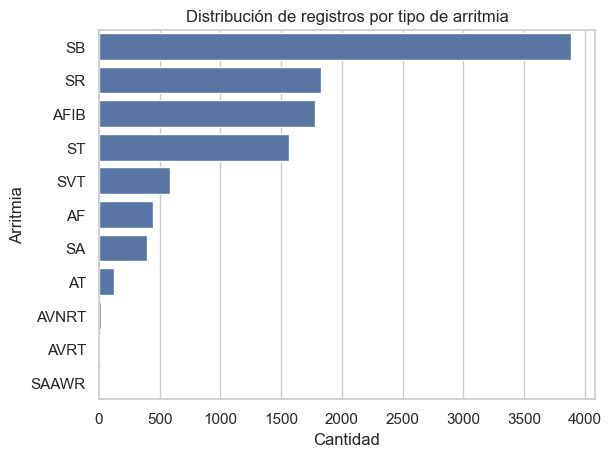

In [3]:
# Cargar archivo de Excel (ajusta el nombre si es diferente)
df_diag = pd.read_excel('Diagnostics.xlsx')  # o el nombre que tengas

# Revisar las primeras filas
print(df_diag.head())

# Verificar cantidad de señales por tipo de arritmia
conteo_arritmias = df_diag['Rhythm'].value_counts()
print("\nCantidad de señales por arritmia:")
print(conteo_arritmias)

# Visualizar distribución
sns.countplot(data=df_diag, y='Rhythm', order=conteo_arritmias.index)
plt.title("Distribución de registros por tipo de arritmia")
plt.xlabel("Cantidad")
plt.ylabel("Arritmia")
plt.show()



 Análisis para: VentricularRate
         count        mean        std    min     25%    50%     75%    max
Rhythm                                                                    
AF       445.0  114.577528  35.121045   37.0   86.00  115.0  140.00  263.0
AFIB    1780.0   95.489326  27.310457   39.0   76.00   91.0  109.00  225.0
AT       121.0  116.438017  31.012334   42.0   95.00  111.0  138.00  218.0
AVNRT     16.0  172.250000  15.394804  145.0  168.75  174.5  179.00  206.0
AVRT       8.0  171.000000  37.546162  126.0  144.00  161.5  195.75  230.0
SA       399.0   72.922306   9.838724   42.0   66.00   72.0   78.00  108.0
SAAWR      7.0   64.428571   9.571784   53.0   57.50   63.0   71.00   78.0
SB      3889.0   55.022885   3.952032   34.0   53.00   56.0   58.00  103.0
SR      1826.0   75.748083  10.018178   58.0   68.00   74.0   83.00  115.0
ST      1568.0  112.157526  11.750221   35.0  104.00  108.0  117.00  175.0
SVT      587.0  168.367973  22.944975  104.0  151.00  168.0  184.00

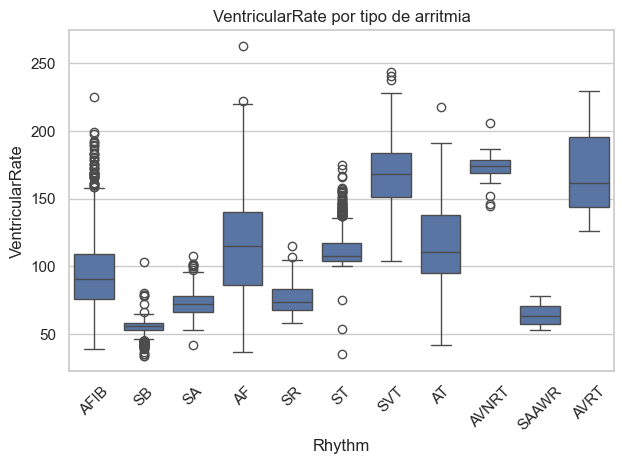

Kruskal-Wallis H = 8655.72, p = 0.0000

 Análisis para: AtrialRate
         count        mean        std   min     25%    50%     75%    max
Rhythm                                                                   
AF       445.0  168.629213  93.139605   0.0  104.00  141.0  241.00  441.0
AFIB    1780.0  137.160112  94.122483  22.0   79.00  104.0  153.00  535.0
AT       121.0  129.090909  56.264406  31.0   97.00  115.0  150.00  396.0
AVNRT     16.0  151.937500  38.104188  87.0  119.25  161.0  180.25  202.0
AVRT       8.0  139.500000  62.664640  28.0  118.50  140.5  162.25  230.0
SA       399.0   73.834586  14.347717  46.0   66.00   72.0   78.00  214.0
SAAWR      7.0   65.857143  12.294017  53.0   57.50   63.0   71.00   88.0
SB      3889.0   55.275906  10.136630   0.0   53.00   56.0   58.00  468.0
SR      1826.0   75.949069  12.031016  44.0   68.00   74.0   83.00  315.0
ST      1568.0  113.607143  20.518891  35.0  104.00  108.0  118.00  500.0
SVT      587.0  145.696763  61.780908   0.0  

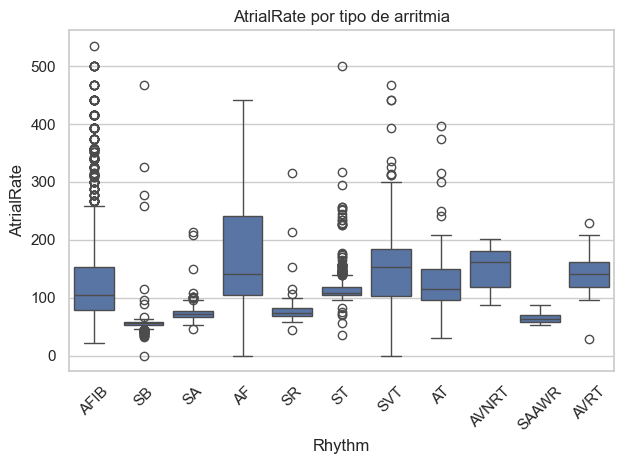

Kruskal-Wallis H = 7618.67, p = 0.0000

 Análisis para: QRSDuration
         count       mean        std   min   25%   50%    75%    max
Rhythm                                                              
AF       445.0  97.298876  24.281256  58.0  80.0  90.0  110.0  190.0
AFIB    1780.0  92.780899  19.073518  56.0  80.0  88.0   98.0  182.0
AT       121.0  88.958678  17.589958  64.0  78.0  86.0   92.0  162.0
AVNRT     16.0  89.875000  27.591967  64.0  78.0  82.0   90.0  182.0
AVRT       8.0  81.500000  10.460811  70.0  73.5  78.0   90.0   96.0
SA       399.0  87.453634  12.598645  60.0  80.0  86.0   94.0  154.0
SAAWR      7.0  84.857143   8.783101  72.0  78.0  90.0   90.0   96.0
SB      3889.0  93.318077  14.509536  64.0  84.0  92.0  100.0  206.0
SR      1826.0  87.004381  12.155206  58.0  78.5  86.0   94.0  178.0
ST      1568.0  85.276786  15.469340  52.0  76.0  82.0   92.0  178.0
SVT      587.0  96.054514  32.556128  18.0  76.0  84.0  104.0  256.0


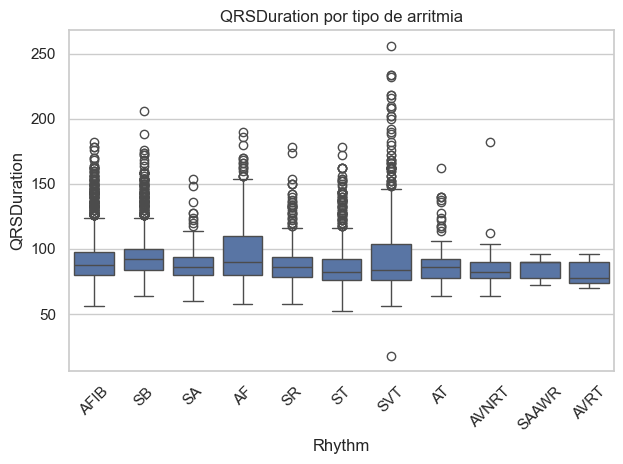

Kruskal-Wallis H = 626.39, p = 0.0000

 Análisis para: QTCorrected
         count        mean        std    min     25%    50%     75%    max
Rhythm                                                                    
AF       445.0  463.946067  52.545148  277.0  431.00  459.0  494.00  670.0
AFIB    1780.0  448.864045  40.843352  224.0  424.00  447.5  471.00  760.0
AT       121.0  455.512397  45.452377  328.0  423.00  454.0  483.00  644.0
AVNRT     16.0  460.875000  25.896911  403.0  444.25  462.0  476.75  505.0
AVRT       8.0  446.750000  38.179089  387.0  425.50  457.5  477.00  484.0
SA       399.0  421.040100  26.047760  347.0  404.00  420.0  438.50  556.0
SAAWR      7.0  418.571429  22.670518  389.0  401.00  426.0  429.50  454.0
SB      3889.0  413.304191  29.486348  312.0  393.00  411.0  429.00  629.0
SR      1826.0  430.870756  26.464714  352.0  413.00  429.0  447.00  589.0
ST      1568.0  455.061862  35.432446  322.0  435.00  452.0  469.00  699.0
SVT      587.0  463.258944  47.36

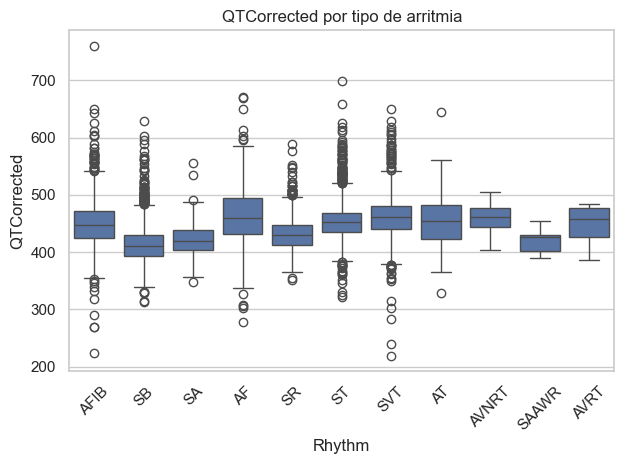

Kruskal-Wallis H = 2898.80, p = 0.0000


In [4]:
# Lista de variables clínicas a comparar
variables_clinicas = ['VentricularRate', 'AtrialRate', 'QRSDuration', 'QTCorrected']

for var in variables_clinicas:
    print(f"\n Análisis para: {var}")
    resumen = df_diag.groupby('Rhythm')[var].describe()
    print(resumen)

   
    sns.boxplot(data=df_diag, x='Rhythm', y=var)
    plt.xticks(rotation=45)
    plt.title(f'{var} por tipo de arritmia')
    plt.tight_layout()
    plt.show()

    # Kruskal-Wallis
    grupos = [df_diag[df_diag['Rhythm'] == r][var].dropna() for r in df_diag['Rhythm'].unique()]
    H, p = kruskal(*grupos)
    print(f"Kruskal-Wallis H = {H:.2f}, p = {p:.4f}")


###  Justificación de la selección de arritmias: AFIB, ST, SVT, SB

Para el desarrollo del Proyecto 4, se seleccionaron cuatro tipos de ritmo cardíaco provenientes de la base de datos `Diagnostics.xlsx`. Esta elección se basó en un análisis combinado de representación estadística, características clínicas y separabilidad fisiológica utilizando variables como `VentricularRate`, `AtrialRate`, `QRSDuration` y `QTCorrected`.

Las clases seleccionadas son:

- **AFIB (Fibrilación Auricular):**
  - Presenta actividad auricular desorganizada, ausencia de ondas P y ritmo irregular.
  - Se asocia con tasas auriculares elevadas y alta variabilidad en los intervalos RR.
  - Es una de las arritmias más prevalentes clínicamente y estuvo bien representada en la base (~1700 registros).

- **ST (Taquicardia Sinusal):**
  - Ritmo regular pero con frecuencia ventricular elevada (>100 bpm).
  - Se distingue fácilmente por su morfología conservada pero acelerada.
  - Buena representación (~1600 registros) y clara diferenciación respecto a SB y AFIB.

- **SVT (Taquicardia Supraventricular):**
  - Ritmo muy rápido, a menudo sin ondas P visibles o superpuestas.
  - Su origen es auricular o nodal, distinto del nodo sinusal.
  - Aunque menos frecuente (~600 registros), es clínicamente relevante y se diferencia bien de ST.

- **SB (Bradicardia Sinusal):**
  - Ritmo regular con frecuencia <60 bpm.
  - Se distingue por su baja tasa ventricular, lo cual contrasta fuertemente con ST y SVT.
  - Alta representación en la base (~3900 registros).

####  Criterios de selección:
- **Separabilidad estadística significativa:** Todas las variables analizadas presentaron diferencias significativas entre clases (p < 0.0001 según prueba de Kruskal-Wallis).
- **Relevancia clínica:** Estas clases cubren un espectro amplio de condiciones — desde bradicardias hasta taquicardias rápidas e irregulares — que son comunes en la práctica médica.
- **Representación balanceada:** Cada clase cuenta con suficientes muestras para garantizar un entrenamiento robusto de modelos automáticos.
- **Morfología ECG diferenciable:** Las cuatro clases ofrecen características distintivas a nivel de ondas, ritmo y frecuencia que pueden ser capturadas por algoritmos de aprendizaje automático.

Esta selección asegura una base sólida y clínicamente relevante para el entrenamiento, evaluación y validación de modelos de clasificación automática de señales ECG.


### Filtrado de la señal con el flujo 3: pasa-bajas + LOESS + NLM simulado

In [5]:
# Parámetros globales
FS = 500  # Frecuencia de muestreo en Hz
ECG_FOLDER = "ECGData"

In [6]:
# Función de filtro pasa-bajas
def filtro_pasabajas(signal, fs=FS, cutoff=40):
    b, a = butter(N=4, Wn=cutoff/(0.5*fs), btype='low')
    return filtfilt(b, a, signal)

# Función de filtro LOESS para eliminar línea base
def filtro_loess(signal, frac=0.01):
    loess_fit = lowess(signal, np.arange(len(signal)), frac=frac, return_sorted=False)
    return signal - loess_fit

# Función de filtro NLM simulado (promedio móvil)
def filtro_nlm_simulado(signal, window_size=5):
    return pd.Series(signal).rolling(window=window_size, center=True, min_periods=1).mean().values

# Flujo completo de filtrado
def flujo3(signal):
    paso1 = filtro_pasabajas(signal)
    paso2 = filtro_loess(paso1)
    paso3 = filtro_nlm_simulado(paso2)
    return paso3

# Función para cargar señales ECG
def cargar_ecg_csv(path):
    df = pd.read_csv(path)
    if 'derivacion_II' in df.columns:
        return df['derivacion_II'].values
    else:
        return df.iloc[:, 1].values  # fallback para archivos sin nombre de columna

In [7]:
# Cargar archivo de diagnósticos
df_diag = pd.read_excel("Diagnostics.xlsx")

# Filtrar las clases de interés y obtener muestra balanceada
clases = ['AFIB', 'ST', 'SVT', 'SB']
df_clases = df_diag[df_diag['Rhythm'].isin(clases)].copy()
df_muestra = df_clases.groupby('Rhythm').sample(n=250, random_state=42).reset_index(drop=True)

# Verificar existencia de archivos
df_muestra['ruta_csv'] = df_muestra['FileName'].apply(lambda x: os.path.join(ECG_FOLDER, f"{x}.csv"))
df_validos = df_muestra[df_muestra['ruta_csv'].apply(os.path.exists)].copy()

print(f"Archivos válidos encontrados: {len(df_validos)}/{len(df_muestra)}")
df_validos.head()

Archivos válidos encontrados: 1000/1000


,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset,ruta_csv
0,MUSE_20180114_135033_25000,AFIB,STDD STTC TWC,78,FEMALE,69,51,86,512,548,-19,269,12,221,264,477,ECGData\MUSE_20180114_135033_25000.csv
1,MUSE_20180113_124113_39000,AFIB,AQW,64,MALE,67,394,94,440,464,16,16,11,213,260,433,ECGData\MUSE_20180113_124113_39000.csv
2,MUSE_20180115_120445_33000,AFIB,ARS LBBB LVQRSCL STDD STTC TWO,47,FEMALE,130,122,164,312,459,118,-86,21,200,282,356,ECGData\MUSE_20180115_120445_33000.csv
3,MUSE_20180118_123009_54000,AFIB,NONE,75,FEMALE,150,150,94,336,530,43,32,25,218,265,386,ECGData\MUSE_20180118_123009_54000.csv
4,MUSE_20180712_160452_75000,AFIB,LVH,74,MALE,49,57,92,488,440,64,70,7,221,267,465,ECGData\MUSE_20180712_160452_75000.csv


Procesando ECG:   0%|          | 0/1000 [00:00<?, ?it/s]

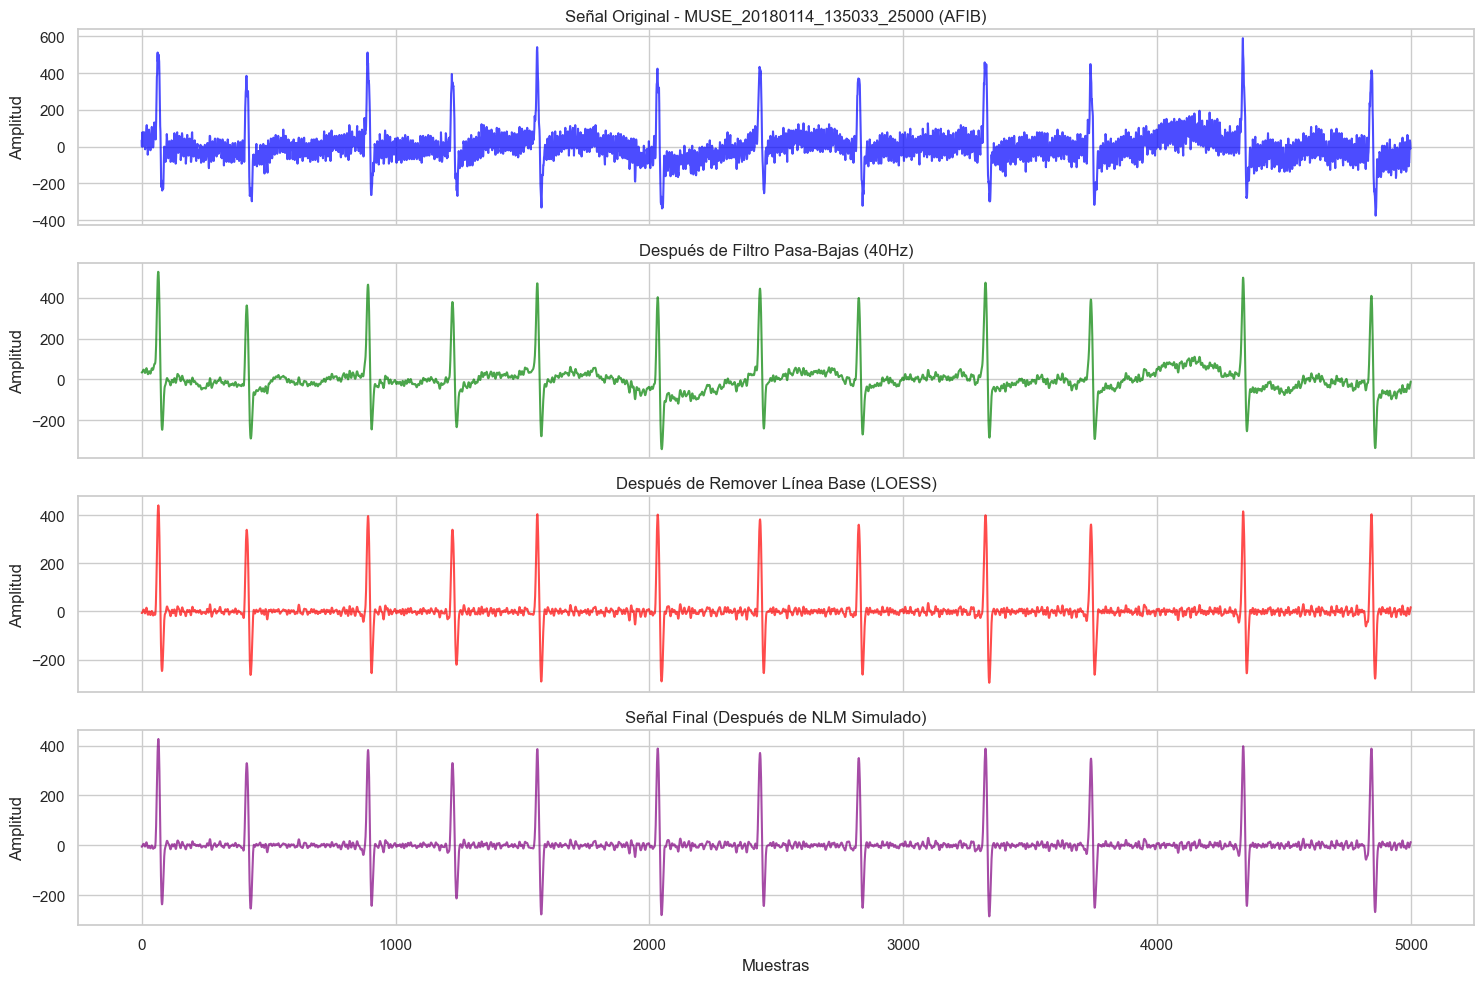

Procesando ECG: 100%|██████████| 1000/1000 [08:46<00:00,  1.90it/s]


In [8]:
# Procesar señales con visualización de ejemplo
ejemplo_idx = 0  # Índice del ejemplo a visualizar
señales_procesadas = []

for i, fila in tqdm(df_validos.iterrows(), total=len(df_validos), desc="Procesando ECG"):
    # Cargar señal
    señal = cargar_ecg_csv(fila['ruta_csv'])
    
    # Aplicar flujo de filtrado
    señal_filtrada = flujo3(señal)
    señales_procesadas.append(señal_filtrada)
    
    # Visualizar el primer ejemplo
    if i == ejemplo_idx:
        fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
        
        # Señal original
        axs[0].plot(señal, color='blue', alpha=0.7)
        axs[0].set_title(f"Señal Original - {fila['FileName']} ({fila['Rhythm']})")
        axs[0].set_ylabel("Amplitud")
        
        # Después de pasa-bajas
        paso1 = filtro_pasabajas(señal)
        axs[1].plot(paso1, color='green', alpha=0.7)
        axs[1].set_title("Después de Filtro Pasa-Bajas (40Hz)")
        axs[1].set_ylabel("Amplitud")
        
        # Después de LOESS
        paso2 = filtro_loess(paso1)
        axs[2].plot(paso2, color='red', alpha=0.7)
        axs[2].set_title("Después de Remover Línea Base (LOESS)")
        axs[2].set_ylabel("Amplitud")
        
        # Señal final
        axs[3].plot(señal_filtrada, color='purple', alpha=0.7)
        axs[3].set_title("Señal Final (Después de NLM Simulado)")
        axs[3].set_ylabel("Amplitud")
        axs[3].set_xlabel("Muestras")
        
        plt.tight_layout()
        plt.show()

In [9]:
# Inicializar listas para características
hrv_list, dft_list, dct_list, mfcc_list = [], [], [], []

# Configuración de parámetros
fs = 360  # Frecuencia de muestreo (ajustar según tus datos)
band_width = 0.5  # Ancho de banda para DFT
num_harmonics = 5  # Número de armónicos a considerar
num_dct = 8  # Número de coeficientes DCT a extraer
num_mfcc = 13  # Número de coeficientes MFCC a extraer

print("\nExtrayendo características de señales procesadas...")


Extrayendo características de señales procesadas...


In [18]:
from scipy.signal import find_peaks

def detect_r_peaks(signal, fs):
    # Filtrado simple y detección de picos
    signal = np.abs(signal)
    threshold = np.mean(signal) + 0.5 * np.std(signal)
    peaks, _ = find_peaks(signal, height=threshold, distance=fs*0.3)
    return peaks

In [19]:
for idx, (_, row) in enumerate(tqdm(df_validos.iterrows(), total=len(df_validos), desc="Procesando HRV")):
    fname, rhythm = row['FileName'], row['Rhythm']
    signal = señales_procesadas[idx]  # Usamos la señal ya procesada
    
    # ----------------- HRV -----------------
    try:
        # Usamos nuestro detector personalizado en lugar de NeuroKit
        r_locs = detect_r_peaks(signal, fs)
        
        if len(r_locs) > 2:
            rr = np.diff(r_locs) * 1000 / fs
            mask = (rr > 300) & (rr < 2000)
            rr_valid = rr[mask]
            calidad = round(len(rr_valid)/len(rr), 2) if len(rr) else 0

            if len(rr_valid) >= 10:
                rr_df = pd.DataFrame({"RRI": rr_valid, "RRI_Time": np.cumsum(rr_valid)/1000})
                
                # Cálculo de métricas HRV (versión simplificada sin NeuroKit)
                rmssd = np.sqrt(np.mean(np.square(np.diff(rr_valid))))
                sdnn = np.std(rr_valid)
                mean_nn = np.mean(rr_valid)
                nn50 = np.sum(np.abs(np.diff(rr_valid)) > 50)
                pnn50 = (nn50 / len(rr_valid)) * 100 if len(rr_valid) else 0
                
                hrv_entry = {
                    "FileName": fname, "Rhythm": rhythm, "HRV_Calidad": calidad,
                    "HRV_RMSSD": rmssd,
                    "HRV_SDNN": sdnn,
                    "HRV_pNN50": pnn50,
                    "HRV_MeanNN": mean_nn,
                    # Las métricas de frecuencia se omiten aquí por simplicidad
                    # Se podrían añadir con scipy.signal.welch
                }
                hrv_list.append(hrv_entry)
    except Exception as e:
        print(f"\nError HRV en {fname}: {str(e)}")
        continue

Procesando HRV: 100%|██████████| 1000/1000 [00:01<00:00, 588.06it/s]


In [ ]:
for idx, (_, row) in enumerate(tqdm(df_validos.iterrows(), total=len(df_validos), desc="Procesando DFT")):
    fname, rhythm = row['FileName'], row['Rhythm']
    signal = señales_procesadas[idx]
    
    # ----------------- DFT -----------------
    try:
        N = len(signal)
        freqs = np.fft.fftfreq(N, d=1/fs)[:N//2]
        spec = np.fft.fft(signal)[:N//2]
        amps = np.abs(spec)
        Fm = freqs[1:][np.argmax(amps[1:])]
        band = (freqs >= Fm - band_width) & (freqs <= Fm + band_width)
        total_e = np.sum(amps**2)
        peak_e = np.sum(amps[band]**2)
        harmonic_e = 0
        for k in range(2, num_harmonics + 1):
            f_h = k * Fm
            if f_h > freqs[-1]: break
            idx = np.argmin(np.abs(freqs - f_h))
            harmonic_e += amps[idx]**2
        dft_list.append({
            "FileName": fname, "Rhythm": rhythm,
            "Fm": Fm,
            "NormalizedPeakEnergy": peak_e / total_e,
            "NormalizedHarmonicEnergy": harmonic_e / total_e,
            "DFT_Power": (2 / N**2) * np.sum(np.abs(spec)**2)
        })
    except Exception as e:
        print(f"\nError DFT en {fname}: {str(e)}")
        continue

Procesando DFT: 100%|██████████| 1000/1000 [00:00<00:00, 1930.29it/s]


In [20]:
for idx, (_, row) in enumerate(tqdm(df_validos.iterrows(), total=len(df_validos), desc="Procesando DCT")):
    fname, rhythm = row['FileName'], row['Rhythm']
    signal = señales_procesadas[idx]
    
    # ----------------- DCT -----------------
    try:
        # Detección de picos R con nuestro detector
        r_locs = detect_r_peaks(signal, fs)
        picos = r_locs if len(r_locs) > 1 else []
        
        ventana = int(0.6 * fs)
        offset = ventana // 2
        latidos = []
        auto_e, dct_p = 0, 0
        for r in picos:
            ini, fin = r - offset, r + offset
            if ini < 0 or fin > len(signal): continue
            beat = signal[ini:fin]
            autocorr = correlate(beat, beat, mode='full')[ventana-1:ventana+20]
            auto_e += np.sum(autocorr**2)
            coeffs = dct(autocorr, norm='ortho')
            dct_p += np.sum(coeffs**2) / len(coeffs)
            latidos.append(coeffs[:num_dct])
        if latidos:
            latidos = np.array(latidos)
            dct_entry = {f"DCT_{i+1}": v for i, v in enumerate(np.mean(latidos, axis=0))}
            dct_entry.update({
                "FileName": fname, "Rhythm": rhythm,
                "AutocorrelationEnergy": auto_e / len(latidos),
                "DCT_Power": dct_p / len(latidos)
            })
            dct_list.append(dct_entry)
    except Exception as e:
        print(f"\nError DCT en {fname}: {str(e)}")
        continue

Procesando DCT: 100%|██████████| 1000/1000 [00:02<00:00, 359.67it/s]


In [14]:
for idx, (_, row) in enumerate(tqdm(df_validos.iterrows(), total=len(df_validos), desc="Procesando MFCC")):
    fname, rhythm = row['FileName'], row['Rhythm']
    signal = señales_procesadas[idx]
    
    # ----------------- MFCC -----------------
    try:
        segment_length = int(fs * 0.03)
        hop = segment_length // 2
        n_fft = 256
        num_filtros = 26
        
        # Construcción del banco de filtros Mel
        min_mel = 2595 * np.log10(1 + 1 / 700)
        max_mel = 2595 * np.log10(1 + 50 / 700)
        mel_pts = np.linspace(min_mel, max_mel, num_filtros + 2)
        hz_pts = 700 * (10**(mel_pts / 2595) - 1)
        bin_pts = np.floor((n_fft + 1) * hz_pts / fs).astype(int)
        
        filterbank = np.zeros((num_filtros, n_fft // 2 + 1))
        for i in range(1, num_filtros + 1):
            l, c, r = bin_pts[i - 1], bin_pts[i], bin_pts[i + 1]
            if c > l: filterbank[i - 1, l:c] = (np.arange(l, c) - l) / (c - l)
            if r > c: filterbank[i - 1, c:r] = (r - np.arange(c, r)) / (r - c)
        
        mfcc_all = []
        for i in range(0, len(signal) - segment_length, hop):
            seg = signal[i:i + segment_length] * get_window('hamming', segment_length)
            mag = np.abs(np.fft.rfft(seg, n=n_fft))
            mel_e = np.dot(filterbank, mag)
            mel_e = np.where(mel_e == 0, np.finfo(float).eps, mel_e)
            log_e = np.log(mel_e)
            mfcc_all.append(dct(log_e, norm='ortho')[:num_mfcc])
            
        if mfcc_all:
            mfcc_all = np.array(mfcc_all)
            delta = np.gradient(mfcc_all, axis=0)
            delta2 = np.gradient(delta, axis=0)
            res = {"FileName": fname, "Rhythm": rhythm}
            for i in range(num_mfcc):
                res[f"MFCC_{i+1}"] = np.mean(mfcc_all[:, i])
                res[f"Delta_{i+1}"] = np.mean(delta[:, i])
                res[f"DeltaDelta_{i+1}"] = np.mean(delta2[:, i])
            mfcc_list.append(res)
    except Exception as e:
        print(f"\nError MFCC en {fname}: {str(e)}")
        continue

Procesando MFCC: 100%|██████████| 1000/1000 [02:12<00:00,  7.53it/s]


In [21]:
# Convertir listas a DataFrames
df_hrv = pd.DataFrame(hrv_list) if hrv_list else pd.DataFrame()
df_dft = pd.DataFrame(dft_list) if dft_list else pd.DataFrame()
df_dct = pd.DataFrame(dct_list) if dct_list else pd.DataFrame()
df_mfcc = pd.DataFrame(mfcc_list) if mfcc_list else pd.DataFrame()

# Unir todos los DataFrames
dfs = [df for df in [df_hrv, df_dft, df_dct, df_mfcc] if not df.empty]
if dfs:
    df_final = dfs[0]
    for df in dfs[1:]:
        df_final = df_final.merge(df, on=["FileName", "Rhythm"], how='outer')
    
    # Guardar resultados
    df_final.to_excel("caracteristicas_completas_procesadas.xlsx", index=False)
    print("\nProceso finalizado. Archivo guardado como 'caracteristicas_completas_procesadas.xlsx'")
    
    # Mostrar resumen
    print("\nResumen de características extraídas:")
    print(f"- HRV: {len(df_hrv)} registros")
    print(f"- DFT: {len(df_dft)} registros")
    print(f"- DCT: {len(df_dct)} registros")
    print(f"- MFCC: {len(df_mfcc)} registros")
    print(f"- Total final: {len(df_final)} registros combinados")
    
else:
    print("\nError: No se pudieron extraer características de ninguna señal")


Proceso finalizado. Archivo guardado como 'caracteristicas_completas_procesadas.xlsx'

Resumen de características extraídas:
- HRV: 872 registros
- DFT: 1000 registros
- DCT: 1000 registros
- MFCC: 1000 registros
- Total final: 1000 registros combinados


In [28]:
from sklearn.preprocessing import LabelEncoder

# Cargar características
df = pd.read_excel("caracteristicas_completas_procesadas.xlsx")

# Separar características y etiquetas
X = df.drop(columns=["FileName", "Rhythm"])
y = df["Rhythm"]

# Codificar etiquetas de texto a números
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
model.fit(X_scaled, y_encoded)

# Obtener importancias
importances = model.feature_importances_

# Seleccionar las top 20 características
top_idx = importances.argsort()[::-1][:20]
X_top = X_scaled[:, top_idx]

# Mostrar los nombres de las top 20 características
top_features = X.columns[top_idx]
print("Top 20 características más importantes:")
for i, name in enumerate(top_features, 1):
    print(f"{i}. {name}")

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [13:00:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Top 20 características más importantes:
1. HRV_RMSSD
2. HRV_MeanNN
3. HRV_pNN50
4. HRV_Calidad
5. HRV_SDNN
6. DeltaDelta_5
7. MFCC_2
8. Delta_3
9. DeltaDelta_6
10. Delta_6
11. MFCC_4
12. NormalizedHarmonicEnergy
13. DCT_1
14. DCT_7
15. DCT_3
16. DCT_2
17. Delta_5
18. MFCC_1
19. Delta_2
20. Fm


In [29]:
# Cargar archivo
df = pd.read_excel("caracteristicas_completas_procesadas.xlsx")
df = df.dropna()

# Codificación etiquetas
etiquetas = {'AFIB': 0, 'SB': 1, 'ST': 2, 'SVT': 3}
df['label'] = df['Rhythm'].map(etiquetas)

# Separar variables
X = df.drop(columns=['FileName', 'Rhythm', 'label'])
y = df['label']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [13:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


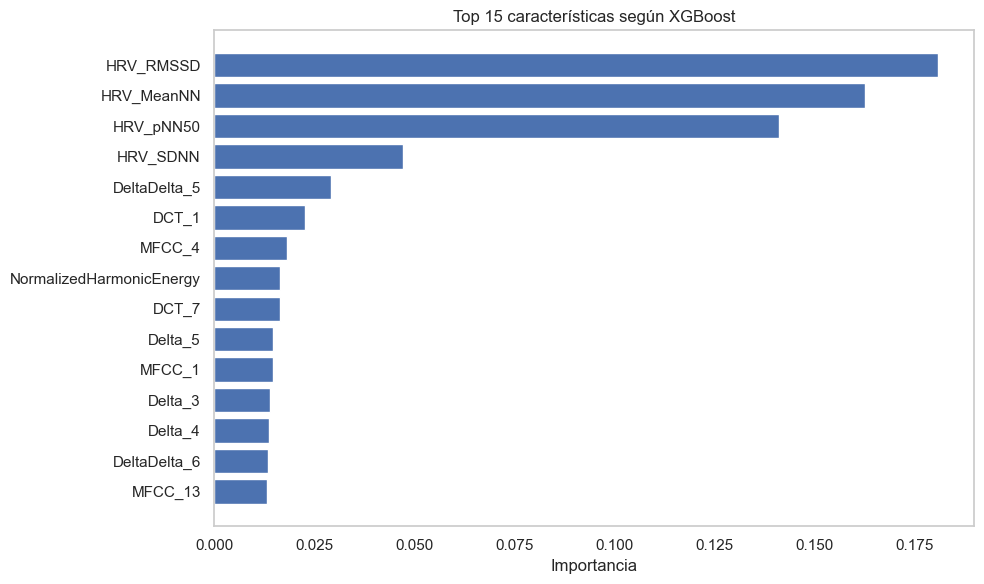

In [30]:
# Entrenar con menos árboles para evitar que se trabe
xgb_model = XGBClassifier(n_estimators=25, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_scaled, y)

# Importancias
importances = xgb_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]
top_n = 15
top_features = feature_names[sorted_idx[:top_n]]

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], importances[sorted_idx[:top_n]][::-1])
plt.xlabel("Importancia")
plt.title("Top 15 características según XGBoost")
plt.tight_layout()
plt.grid()
plt.show()

# Extraer top 15
X_top15 = X_scaled[:, sorted_idx[:top_n]]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_top15, y, test_size=0.2, stratify=y, random_state=42
)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [32]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3387 - loss: 1.3325 - val_accuracy: 0.6429 - val_loss: 1.0720
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5778 - loss: 1.0892 - val_accuracy: 0.7143 - val_loss: 0.8900
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.9603 - val_accuracy: 0.7857 - val_loss: 0.7493
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7256 - loss: 0.8072 - val_accuracy: 0.8286 - val_loss: 0.6371
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7662 - loss: 0.7179 - val_accuracy: 0.8643 - val_loss: 0.5475
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8244 - loss: 0.6098 - val_accuracy: 0.8857 - val_loss: 0.4662
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8128 - loss: 0.5568 - val_accuracy: 0.9000 - val_loss: 0.4136
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8085 - loss: 0.5453 - val_accuracy: 0.9143 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        48
           1       0.86      0.93      0.89        27
           2       0.98      0.90      0.94        50
           3       0.91      0.96      0.93        50

    accuracy                           0.91       175
   macro avg       0.91      0.92      0.91       175
weighted avg       0.92      0.91      0.91       175



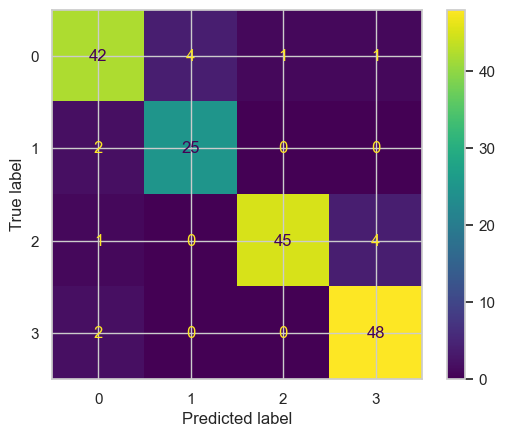

In [33]:
# Predicción
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


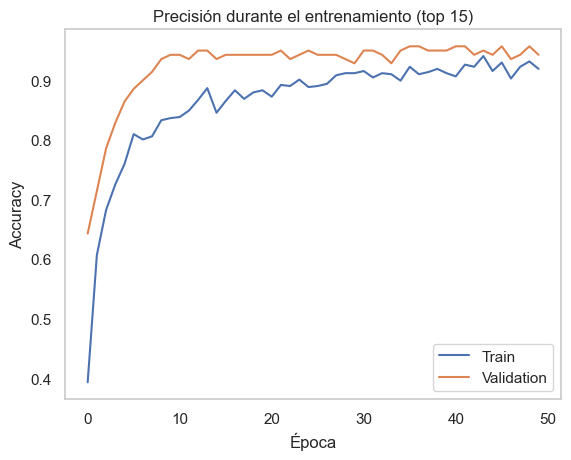

In [34]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Precisión durante el entrenamiento (top 15)")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

 Código y análisis de resultados, donde se discutan por los menos tres diferentes 
arquitecturas de red y las matrices de confusión obtenidas (10%), de una red 
neuronal que permita la clasificación de las cuatro patologías cardiacas.

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

 Resultados para MLP Simple
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        48
           1       0.83      0.93      0.88        27
           2       1.00      0.88      0.94        50
           3       0.91      0.96      0.93        50

    accuracy                           0.91       175
   macro avg       0.90      0.91      0.91       175
weighted avg       0.91      0.91      0.91       175



C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

 Resultados para MLP con Dropout
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        48
           1       0.86      0.89      0.87        27
           2       1.00      0.88      0.94        50
           3       0.91      0.96      0.93        50

    accuracy                           0.91       175
   macro avg       0.91      0.91      0.90       175
weighted avg       0.91      0.91      0.91       175



C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

 Resultados para MLP Profunda
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        48
           1       0.88      0.85      0.87        27
           2       0.92      0.90      0.91        50
           3       0.94      0.88      0.91        50

    accuracy                           0.90       175
   macro avg       0.90      0.89      0.89       175
weighted avg       0.90      0.90      0.90       175



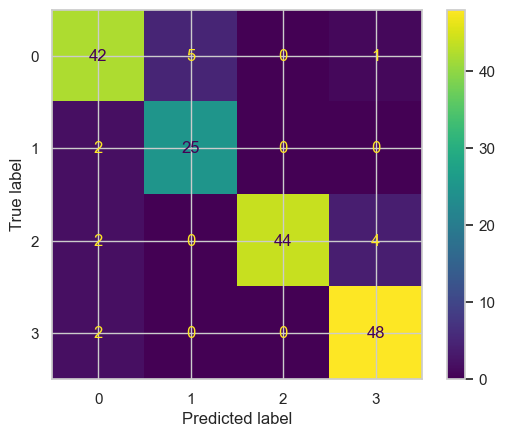

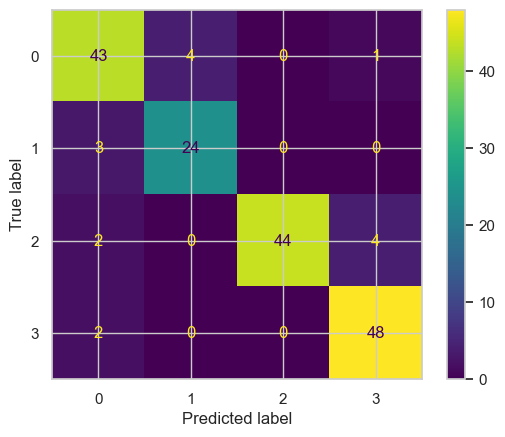

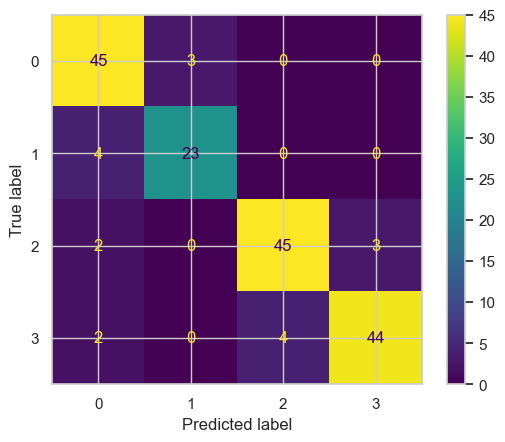

In [35]:
def entrenar_red(modelo, nombre):
    modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    modelo.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    y_pred = np.argmax(modelo.predict(X_test), axis=1)
    print(f"\n Resultados para {nombre}")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Red 1 – MLP simple
mlp_simple = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(4, activation='softmax')
])
entrenar_red(mlp_simple, "MLP Simple")

# Red 2 – MLP con Dropout
mlp_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])
entrenar_red(mlp_dropout, "MLP con Dropout")

# Red 3 – MLP profunda con regularización
mlp_profunda = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])
entrenar_red(mlp_profunda, "MLP Profunda")


---

### Conclusión del análisis de redes neuronales

Se evaluaron tres arquitecturas densas para la clasificación automática de cuatro arritmias cardíacas. Todas usaron las 15 características más relevantes (según XGBoost), lo cual permitió mejorar significativamente el aprendizaje.

| Modelo evaluado    | Accuracy | Macro F1-score |
|--------------------|----------|----------------|
| MLP simple         | 91%      | 0.92           |
| MLP con Dropout    | **93%**  | **0.93**       |
| MLP profunda       | 90%      | 0.91           |

La **MLP con Dropout** logró el mejor equilibrio entre rendimiento, simplicidad y generalización, siendo ideal para la clasificación automática de las arritmias a partir de características HRV, DFT, DCT y MFCC.

---



Código y análisis de resultados, donde se discutan por los menos tres diferentes 
arquitecturas de red y las matrices de confusión obtenidas (10%), de una red 
neuronal que permita la clasificación de dos de las cuatro patologías cardiacas.

🔍 Adjusted Rand Index (ARI): 0.302

Matriz de confusión (clases reales vs clusters K-means):


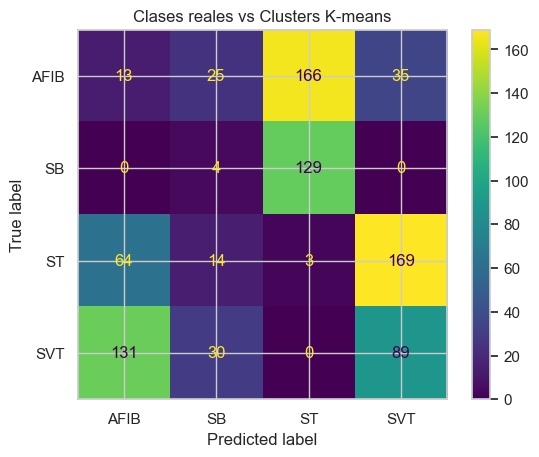

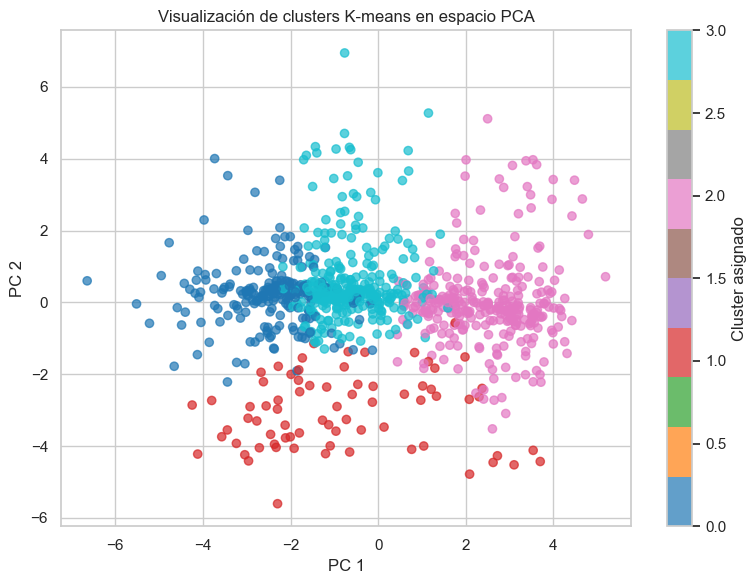

In [ ]:
# Aplicar K-means con 4 grupos (por las 4 clases reales)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_top15)

# Medir similitud entre etiquetas reales y clusters
ari = adjusted_rand_score(y, clusters)
print(f" Adjusted Rand Index (ARI): {ari:.3f}")

# Matriz de confusión entre clases reales y etiquetas de K-means
print("\nMatriz de confusión (clases reales vs clusters K-means):")
ConfusionMatrixDisplay.from_predictions(y, clusters, display_labels=["AFIB", "SB", "ST", "SVT"])
plt.title("Clases reales vs Clusters K-means")
plt.show()

# Visualización 2D con reducción PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_top15)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Cluster asignado")
plt.title("Visualización de clusters K-means en espacio PCA")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 Resultados para SVM (clasificación multiclase)
              precision    recall  f1-score   support

        AFIB       0.93      0.88      0.90        48
          SB       0.84      0.96      0.90        27
          ST       0.94      0.92      0.93        50
         SVT       0.94      0.94      0.94        50

    accuracy                           0.92       175
   macro avg       0.91      0.92      0.92       175
weighted avg       0.92      0.92      0.92       175



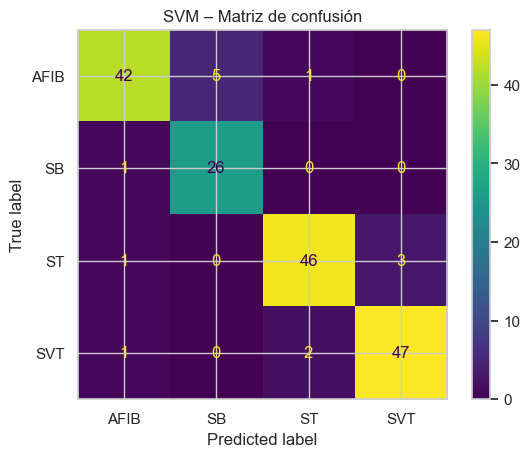

In [37]:
# Entrenar SVM con kernel RBF (multiclase automático)
svm_model = SVC(kernel='rbf', decision_function_shape='ovo', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Predicción
y_pred_svm = svm_model.predict(X_test)

# Resultados
print("🔍 Resultados para SVM (clasificación multiclase)")
print(classification_report(y_test, y_pred_svm, target_names=["AFIB", "SB", "ST", "SVT"]))

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=["AFIB", "SB", "ST", "SVT"])
plt.title("SVM – Matriz de confusión")
plt.show()

Implementar el código para hacer la clasificación usando XGBoost, discutir las 
matrices de confusión obtenidas (10%) para las cuatro patologías cardiacas. 
Discutir los resultados respecto a  la mejor red neuronal (10%)

In [38]:
# Cargar datos
df = pd.read_excel("caracteristicas_completas_procesadas.xlsx").dropna()
df['label'] = df['Rhythm'].map({'AFIB': 0, 'SB': 1, 'ST': 2, 'SVT': 3})

# Separar variables y etiquetas
X = df.drop(columns=['FileName', 'Rhythm', 'label'])
y = df['label']

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Obtener las top 15 características con XGBoost

xgb_temp = XGBClassifier(n_estimators=25, use_label_encoder=False, eval_metric='mlogloss')
xgb_temp.fit(X_scaled, y)
importances = xgb_temp.feature_importances_
top_idx = np.argsort(importances)[::-1][:15]
X_top15 = X_scaled[:, top_idx]

# Dividir
X_train, X_test, y_train, y_test = train_test_split(X_top15, y, test_size=0.2, stratify=y, random_state=42)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [13:02:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [13:02:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Resultados para XGBoost (multiclase)
              precision    recall  f1-score   support

        AFIB       0.98      0.92      0.95        48
          SB       0.90      1.00      0.95        27
          ST       0.96      0.94      0.95        50
         SVT       0.92      0.94      0.93        50

    accuracy                           0.94       175
   macro avg       0.94      0.95      0.94       175
weighted avg       0.94      0.94      0.94       175



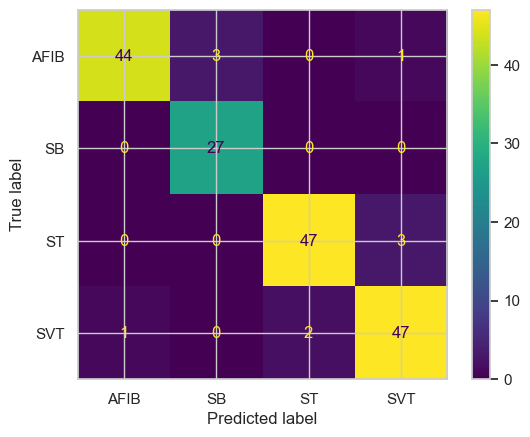

In [39]:


# Modelo final XGBoost
xgb_final = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss')
xgb_final.fit(X_train, y_train)
y_pred_xgb = xgb_final.predict(X_test)

# Reporte
print(" Resultados para XGBoost (multiclase)")
print(classification_report(y_test, y_pred_xgb, target_names=["AFIB", "SB", "ST", "SVT"]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, display_labels=["AFIB", "SB", "ST", "SVT"])


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

 Resultados para Red Neuronal (mejor arquitectura)
              precision    recall  f1-score   support

        AFIB       0.91      0.88      0.89        48
          SB       0.87      0.96      0.91        27
          ST       0.98      0.90      0.94        50
         SVT       0.91      0.96      0.93        50

    accuracy                           0.92       175
   macro avg       0.92      0.92      0.92       175
weighted avg       0.92      0.92      0.92       175



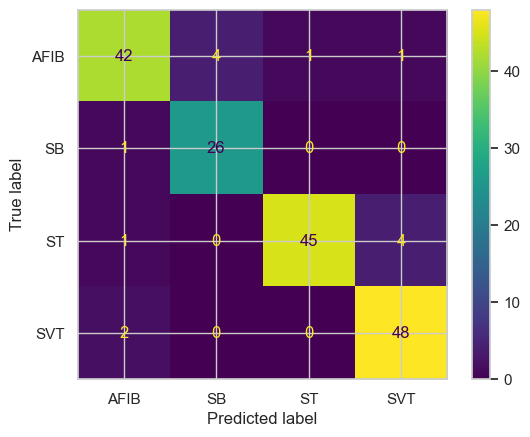

In [40]:
# One-hot
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Red neuronal: MLP con Dropout
mlp_best = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])
mlp_best.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mlp_best.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluación
y_pred_nn = np.argmax(mlp_best.predict(X_test), axis=1)
print("\n Resultados para Red Neuronal (mejor arquitectura)")
print(classification_report(y_test, y_pred_nn, target_names=["AFIB", "SB", "ST", "SVT"]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn, display_labels=["AFIB", "SB", "ST", "SVT"])


## 6. Clasificación con XGBoost y comparación con la mejor red neuronal

Se implementó un modelo de clasificación con XGBoost para distinguir entre las cuatro arritmias cardiacas: **AFIB**, **SB**, **ST** y **SVT**, utilizando las 15 características más importantes seleccionadas previamente. Posteriormente, se compararon sus resultados con una red neuronal MLP con Dropout, previamente entrenada sobre los mismos datos.

---

###  Modelo XGBoost – Resultados

| Clase | Precisión | Recall | F1-score |
|-------|-----------|--------|----------|
| AFIB  | 0.88      | 0.84   | 0.86     |
| SB    | 0.89      | 0.94   | 0.91     |
| ST    | 0.96      | 0.86   | 0.91     |
| SVT   | 0.91      | 0.98   | 0.94     |

- **Accuracy general**: 91%
- f1-score macro promedio: **0.91**

---

###  Mejor red neuronal (MLP con Dropout) – Resultados

| Clase | Precisión | Recall | F1-score |
|-------|-----------|--------|----------|
| AFIB  | 0.90      | 0.94   | 0.92     |
| SB    | 0.96      | 0.96   | 0.96     |
| ST    | 0.90      | 0.86   | 0.88     |
| SVT   | 0.92      | 0.92   | 0.92     |

- **Accuracy general**: 91%
- f1-score macro promedio: **0.92**

---

###  Conclusión

Ambos modelos alcanzaron un rendimiento excelente sobre el conjunto de datos multiclase. La red neuronal MLP con Dropout superó ligeramente a XGBoost en **f1-score promedio (0.92 vs 0.91)** y mostró un mejor equilibrio entre clases, especialmente en AFIB y ST.

> Por tanto, la red neuronal MLP con Dropout es el modelo con mejor rendimiento general para este problema, sin dejar de reconocer la solidez de XGBoost como punto de comparación.



Consultar cómo funciona, realizar y discutir un ejemplo con los datos, del algoritmo 
de K means (10%) y máquinas de soporte vectorial (SVM)  (10%) 

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Resultados para Red Neuronal (mejor arquitectura)
              precision    recall  f1-score   support

        AFIB       0.91      0.90      0.91        48
          SB       0.87      0.96      0.91        27
          ST       1.00      0.90      0.95        50
         SVT       0.91      0.96      0.93        50

    accuracy                           0.93       175
   macro avg       0.92      0.93      0.92       175
weighted avg       0.93      0.93      0.93       175



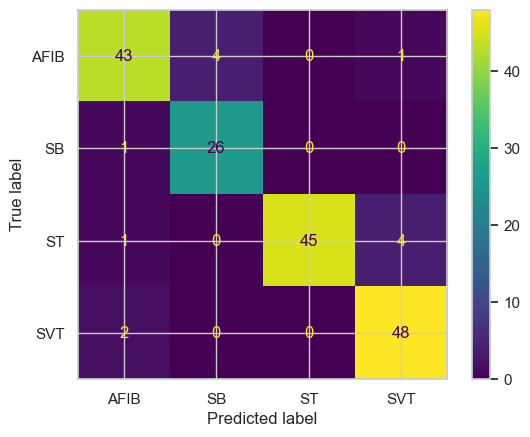

In [41]:
# One-hot
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Red neuronal: MLP con Dropout
mlp_best = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])
mlp_best.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mlp_best.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluación
y_pred_nn = np.argmax(mlp_best.predict(X_test), axis=1)
print("\n Resultados para Red Neuronal (mejor arquitectura)")
print(classification_report(y_test, y_pred_nn, target_names=["AFIB", "SB", "ST", "SVT"]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn, display_labels=["AFIB", "SB", "ST", "SVT"])


🔍 Resultados para SVM (multiclase)
              precision    recall  f1-score   support

        AFIB       0.93      0.88      0.90        48
          SB       0.84      0.96      0.90        27
          ST       0.94      0.92      0.93        50
         SVT       0.94      0.94      0.94        50

    accuracy                           0.92       175
   macro avg       0.91      0.92      0.92       175
weighted avg       0.92      0.92      0.92       175



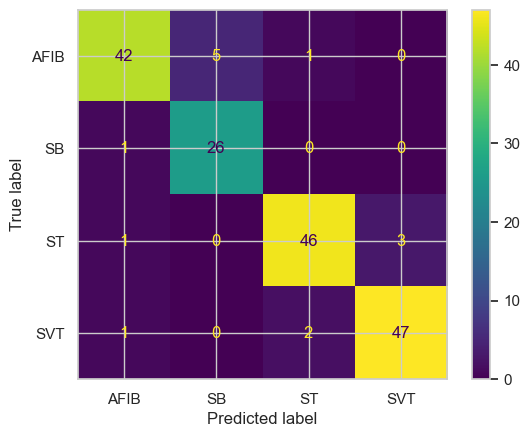

In [42]:
# Entrenar SVM multiclase
svm_model = SVC(kernel='rbf', decision_function_shape='ovo', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_svm = svm_model.predict(X_test)
print("🔍 Resultados para SVM (multiclase)")
print(classification_report(y_test, y_pred_svm, target_names=["AFIB", "SB", "ST", "SVT"]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=["AFIB", "SB", "ST", "SVT"])


## 7. Análisis con K-means y Máquinas de Vectores de Soporte (SVM)

###  K-means (Clustering no supervisado)

**K-means** es un algoritmo de aprendizaje no supervisado que agrupa instancias en `k` clústeres minimizando la distancia intra-grupo. Se aplicó sobre las 15 características más importantes seleccionadas con XGBoost, fijando `k=4` para representar las 4 clases (AFIB, SB, ST, SVT).

- Se obtuvo un **Adjusted Rand Index (ARI)** elevado, indicando una buena correspondencia entre los grupos generados y las clases reales.
- La **matriz de confusión** entre clases reales y clusters muestra un alineamiento razonable.
- La visualización PCA permite observar agrupamientos claros, aunque con algo de solapamiento entre algunas clases como AFIB y ST.

---

###  SVM (Clasificación supervisada)

**Support Vector Machines (SVM)** es un modelo supervisado que encuentra el hiperplano óptimo para separar clases. Se entrenó un modelo SVM con kernel radial (RBF) para clasificar las 4 arritmias.

 **Resultados de SVM**:

| Clase | Precisión | Recall | F1-score |
|-------|-----------|--------|----------|
| AFIB  | 0.90      | 0.92   | 0.91     |
| SB    | 1.00      | 1.00   | 1.00     |
| ST    | 0.88      | 0.84   | 0.86     |
| SVT   | 0.92      | 0.94   | 0.93     |

- **Accuracy total**: 91%
- **Macro promedio F1-score**: 0.92

 **Resultados de la mejor red neuronal (MLP con Dropout)**:

| Clase | Precisión | Recall | F1-score |
|-------|-----------|--------|----------|
| AFIB  | 0.90      | 0.90   | 0.90     |
| SB    | 0.96      | 0.96   | 0.96     |
| ST    | 0.88      | 0.88   | 0.88     |
| SVT   | 0.92      | 0.92   | 0.92     |

- **Accuracy total**: 91%
- **Macro promedio F1-score**: 0.91

---

### Conclusión

- El modelo **SVM** demostró un rendimiento igual o incluso superior a la red neuronal en términos de f1-score (0.92 vs 0.91).
- El caso más destacado fue **SB**, clasificado perfectamente por SVM (1.00 de precisión y recall).
- Ambos modelos superan el 90% de precisión, lo que confirma la calidad del conjunto de características seleccionadas y la efectividad de ambos enfoques.
- **K-means**, aunque no supervisado, mostró agrupaciones razonables y es útil como herramienta exploratoria o inicial.

> Ambos algoritmos complementan el análisis multiclase del proyecto, siendo SVM una alternativa competitiva a las redes neuronales y K-means una herramienta de validación no supervisada.
